In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# importing data
cls_df = pd.read_csv('course_lead_scoring.csv')

cls_df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [17]:
# EDA
# exploring the stats of features
cls_df.describe(include='all')

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
count,1334,1328,1462.000000,1281.000000,1362,1399,1462.000000,1462.000000,1462.000000
unique,5,7,NaN,NaN,4,7,NaN,NaN,NaN
top,organic_search,retail,NaN,NaN,self_employed,north_america,NaN,NaN,NaN
freq,282,203,NaN,NaN,352,225,NaN,NaN,NaN
mean,NaN,NaN,2.031464,59886.273224,NaN,NaN,2.976744,0.506108,0.619015
std,NaN,NaN,1.449717,15070.140389,NaN,NaN,1.681564,0.288465,0.485795
min,NaN,NaN,0.000000,13929.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,49698.000000,NaN,NaN,2.000000,0.262500,0.000000
50%,NaN,NaN,2.000000,60148.000000,NaN,NaN,3.000000,0.510000,1.000000
75%,NaN,NaN,3.000000,69639.000000,NaN,NaN,4.000000,0.750000,1.000000


In [18]:
# find missing values
cls_df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [19]:
# datatypes of each feature variable
cls_df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [35]:
# filtering categorical and numerical cols
cat_cols = cls_df.select_dtypes(include=['object', 'category']).columns
num_cols = cls_df.select_dtypes(include=['number']).columns

print(cat_cols, num_cols, sep='\n\n')

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score', 'converted'],
      dtype='object')


In [21]:
# replacing missing values
for col in cls_df.columns[cls_df.isnull().any()]:
    
    # replace NaN in cat cols with NA 
    if col in cat_cols:
        cls_df[col].fillna('NA', inplace=True)
        
    # replace NaN in cat cols with 0.0
    elif col in num_cols:
        cls_df[col].fillna(0.0, inplace=True)

print(cls_df.isnull().sum())
print()
print(cls_df.dtypes)

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object


In [22]:
# looking at the dtypes and values of all features
print(cls_df.info(verbose=True))
print()
cls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1462 non-null   object 
 1   industry                  1462 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1462 non-null   float64
 4   employment_status         1462 non-null   object 
 5   location                  1462 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB
None



,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [26]:
# looking at the stats of all features
cls_df.describe(include='all')

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
count,1462,1462,1462.000000,1462.000000,1462,1462,1462.000000,1462.000000,1462.000000
unique,6,8,NaN,NaN,5,8,NaN,NaN,NaN
top,organic_search,retail,NaN,NaN,self_employed,north_america,NaN,NaN,NaN
freq,282,203,NaN,NaN,352,225,NaN,NaN,NaN
mean,NaN,NaN,2.031464,52472.172367,NaN,NaN,2.976744,0.506108,0.619015
std,NaN,NaN,1.449717,24254.347030,NaN,NaN,1.681564,0.288465,0.485795
min,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,44097.250000,NaN,NaN,2.000000,0.262500,0.000000
50%,NaN,NaN,2.000000,57449.500000,NaN,NaN,3.000000,0.510000,1.000000
75%,NaN,NaN,3.000000,68241.000000,NaN,NaN,4.000000,0.750000,1.000000


In [ ]:
# checking if all categorical values are correct
for col in cat_cols:
    print(cls_df[col].unique())
    print()

['paid_ads' 'social_media' 'events' 'referral' 'organic_search' 'NA']

['NA' 'retail' 'healthcare' 'education' 'manufacturing' 'technology'
 'other' 'finance']

['unemployed' 'employed' 'NA' 'self_employed' 'student']

['south_america' 'australia' 'europe' 'africa' 'middle_east' 'NA'
 'north_america' 'asia']



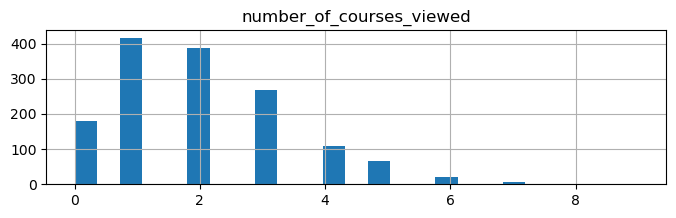

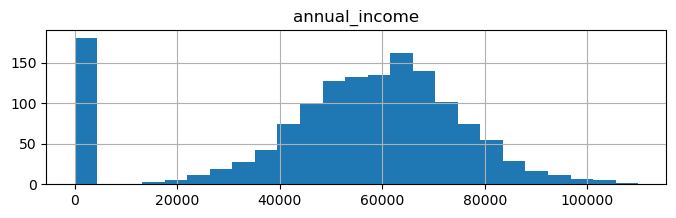

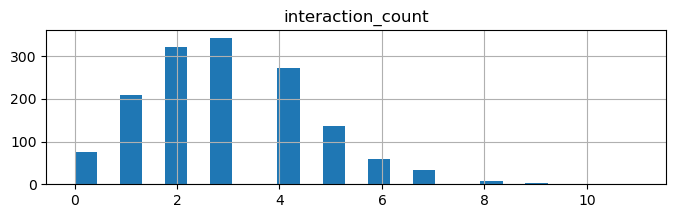

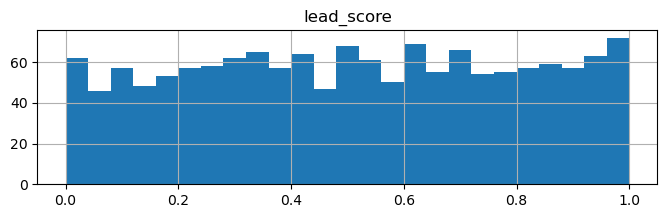

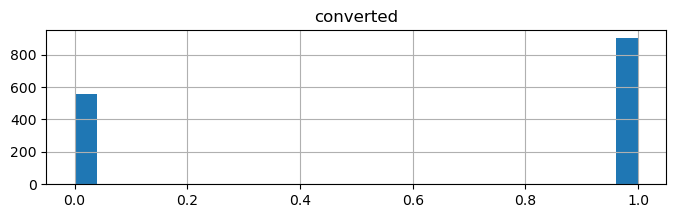

In [51]:
# checking all numerical values
for col in num_cols:
    plt.figure(figsize=(8, 2))
    cls_df[col].hist(bins=25)
    plt.title(str(col))
    plt.show()

In [34]:
# QUESTION 1
# most frequent category in 'industry'
print(cls_df['industry'].value_counts(ascending=False))
print('double check if all records are considered:', cls_df.shape[0], cls_df['industry'].value_counts(ascending=False).sum())
print()
print("Most frequent category in 'industry' feature is ==>", cls_df['industry'].mode()[0])

retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: industry, dtype: int64
double check if all records are considered: 1462 1462

Most frequent category in 'industry' feature is ==> retail
